# AUC ROC curves comparing COVID-GRAM

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.metrics import auc, roc_curve, roc_auc_score

sns.set_theme(style="whitegrid", palette=None, font_scale=1.4)

## AUC ROC curves of one model only

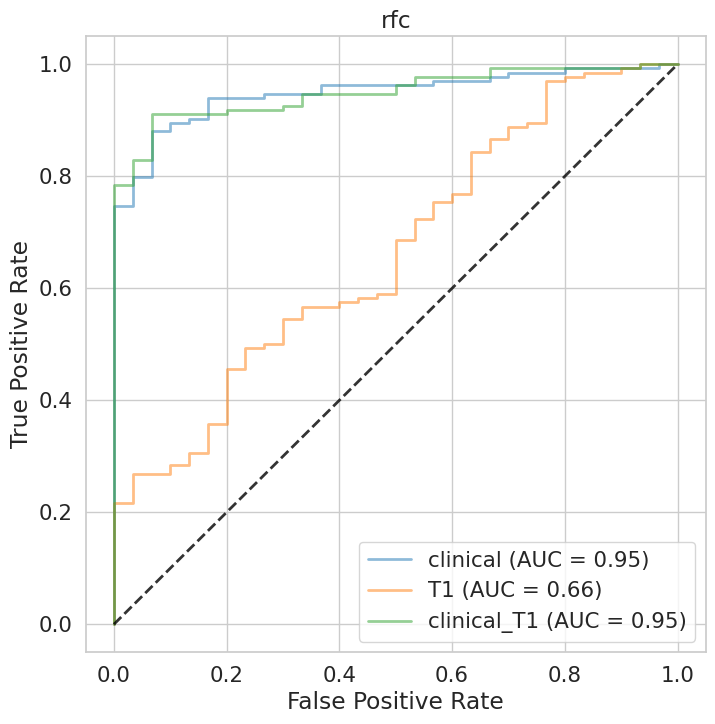

In [2]:
model = "rfc"
datasetTimepoint = "12_uponAdmission"

fileNames = {"clinical":"boruta",
             "T1":"iterativeBoruta",
             "clinical_T1":"clinical+bestSterols"}

fig, ax = plt.subplots(1,1,figsize=(8,8))
for dataset, varset in fileNames.items():
    if dataset == "T1": 
        datasetTimepoint = "12_sterol_discoveryValidation_corrected"
    else: 
        datasetTimepoint = "12_uponAdmission"

    prodPred = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{datasetTimepoint}/{varset}/modelComparison/zigaPipeline/individualPredictions_test_{model}.csv") 

    fpr, tpr, _ = roc_curve(prodPred["y_true"],prodPred["y_predProb"])
    
    auc_val = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=2, alpha=0.5, label=f'{dataset} (AUC = %0.2f)' % (auc_val))
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(model)
    plt.legend(loc="lower right")

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)
plt.show()

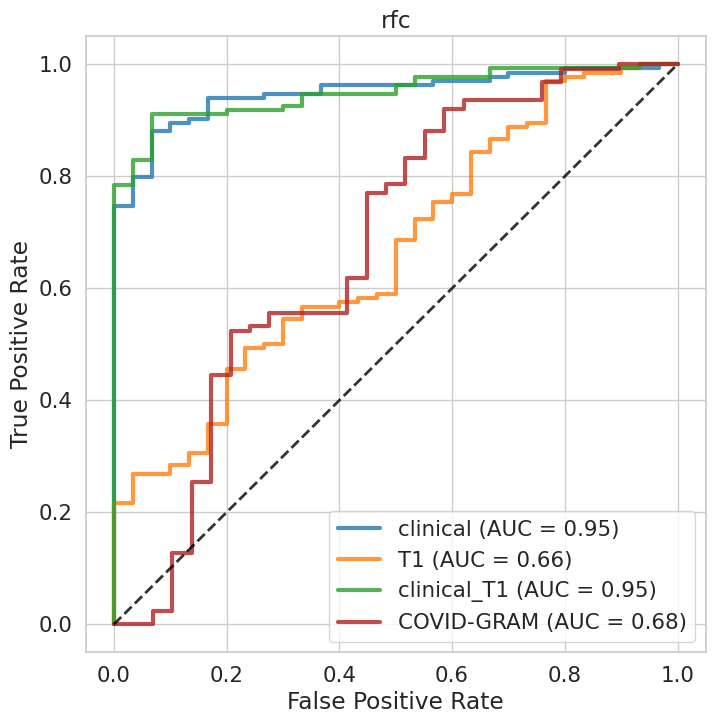

In [3]:
''' 
General settings
'''
model = "rfc"
datasetTimepoint = "12_uponAdmission"
fileNames = {"clinical":"boruta",
             "T1":"iterativeBoruta",
             "clinical_T1":"clinical+bestSterols"}

''' 
Print settings
'''
alpha = 0.8

fig, ax = plt.subplots(1,1,figsize=(8,8))
for dataset, varset in fileNames.items():
    if dataset == "T1": 
        datasetTimepoint = "12_sterol_discoveryValidation_corrected"
    else: 
        datasetTimepoint = "12_uponAdmission"

    prodPred = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{datasetTimepoint}/{varset}/modelComparison/zigaPipeline/individualPredictions_test_{model}.csv") 

    fpr, tpr, _ = roc_curve(prodPred["y_true"],prodPred["y_predProb"])
    
    auc_val = auc(fpr, tpr)
    ax.plot(fpr, tpr, lw=3, alpha=alpha, label=f'{dataset} (AUC = %0.2f)' % (auc_val))
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(model)


'''
Add COVID GRAM AUC ROC curve 
'''

with open("/home/skatz/PROJECTS/covid/disease_severity/discoveryValidation/clinical/results/prediction/COVID_GRAM/fpr_tpr_auc.p", "rb") as f: gram_fpr, gram_tpr = pickle.load(f)
gram_roc_auc = auc(gram_fpr, gram_tpr)

ax.plot(gram_fpr, gram_tpr, color='firebrick', alpha=alpha,
         lw=3, label=f'COVID-GRAM (AUC = %0.2f)' % gram_roc_auc)

''''''

plt.legend(loc="lower right")
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)
plt.show()

# Check probability predictions

In [5]:
''' 
General settings
'''
model = "rfc"
datasetTimepoint = "12_uponAdmission"
fileNames = {"T1":"boruta"}
# fileNames = {"clinical":"boruta",
#              "T1":"boruta",
#              "clinical_T1":"boruta+bestSterols"}

for dataset, varset in fileNames.items():
    if dataset == "T1": 
        datasetTimepoint = "12_sterol_discoveryValidation"
    else: 
        datasetTimepoint = "12_uponAdmission"
    prodPred = pd.read_csv(f"../../{dataset}/results/prediction/featureSelection/{datasetTimepoint}/{varset}/modelComparison/zigaPipeline/individualPredictions_test_{model}.csv") 

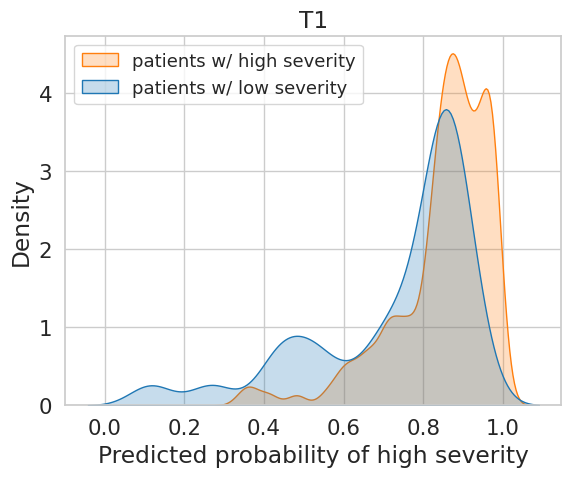

In [11]:
fig, ax = plt.subplots()
d

### Add hisotgram
#ax.legend(loc=2)
#ax2 = ax.twinx()
#ax2.set_yscale('log')
#sns.histplot(prodPred,x="y_predProb",hue="y_true", common_norm=False, bins=10, alpha=0.5)